In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
file="indian_startup_funding_Lab7.xlsx"
df=pd.read_excel(file)

In [3]:
df.duplicated(subset=None,keep='first').sum()

0

In [4]:
df.isnull().sum()

Sr No                  0
Date                   0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         2
InvestmentnType        3
Amount in USD          0
Remarks              111
Column1              110
Column2              103
Column3              103
dtype: int64

In [5]:
df.dropna(subset=["Investors Name","InvestmentnType"],axis=0,inplace=True)

In [6]:
df.drop(["Remarks","Column1","Column2","Column3"],axis=1,inplace=True)

In [9]:
#Recheck if there is any other null values
df.isnull().sum()

Sr No                0
Date                 0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [8]:
df[df['Amount in USD']=='Undisclosed']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
44,59,2019-08-19,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed
107,113,2019-02-01,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed


In [11]:
df.drop(labels=[44,107], axis=0,inplace=True)

In [14]:
df[df['Amount in USD']=='Undisclosed']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD


In [15]:
df['Amount in USD']=pd.to_numeric(df['Amount in USD'],errors='coerce')

In [16]:
df.dtypes

Sr No                         int64
Date                 datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD               float64
dtype: object

In [17]:
df['Amount in USD'].mean()

94857895.25

In [18]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,231000000.0
1,12,2019-12-17,Healthians,B2B-focused foodtech startup,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,12000000.0
2,13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,30000000.0
4,15,2019-12-14,Trell,Video,Experience Discovery Platform,Bengaluru,Ruizheng Investment,Seed Round,2000000.0
5,11,2019-12-13,Rivigo,Technology,Logistics Services and Solutions,Gurgaon,"SAIF Partners, Spring Canter Investment Ltd.",Series F,20000000.0


In [19]:
#Download file to correct speelling mistakes using excel

df.to_csv("STARTUP FUNDING.csv",index=False)

In [20]:
file="STARTUP FUNDING.csv"
df=pd.read_csv(file)
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,231000000.0
1,12,2019-12-17,Healthians,B2B-focused foodtech startup,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,12000000.0
2,13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,30000000.0
3,15,2019-12-14,Trell,Video,Experience Discovery Platform,Bengaluru,Ruizheng Investment,Seed Round,2000000.0
4,11,2019-12-13,Rivigo,Technology,Logistics Services and Solutions,Gurgaon,"SAIF Partners, Spring Canter Investment Ltd.",Series F,20000000.0


In [22]:
df['Amount in USD']=df['Amount in USD'].astype('float')

In [23]:
df.dtypes

Sr No                  int64
Date                  object
Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentnType       object
Amount in USD        float64
dtype: object

In [33]:
df_locations=df.groupby('City  Location').sum()

df_InVer=df.groupby('Industry Vertical').sum()

In [38]:
#Get top 10 largest top 10 Amount in USD according to locations
df_top_location=df_locations.nlargest(10, 'Amount in USD')

#Get top 10 largest top 10 Amount in USD according to industry
df_industry=df_InVer.nlargest(10, 'Amount in USD')

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount in USD')

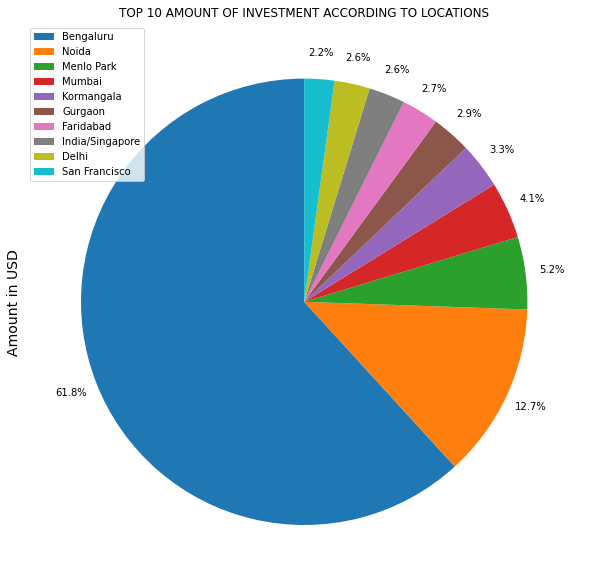

In [39]:
df_top_location.plot(kind='pie',y='Amount in USD',figsize=(10,15),autopct='%1.1f%%',
                startangle=90,labels=None,pctdistance=1.12)
plt.title("TOP 10 AMOUNT OF INVESTMENT ACCORDING TO LOCATIONS")
plt.ylabel("Amount in USD", size=14)

In [46]:
industry=df_industry.index
amount=df_industry["Amount in USD"]/10000000

C:\Users\owner\AppData\Local\Temp/ipykernel_22640/2087721639.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('INDUSTRY',SIZE=15)


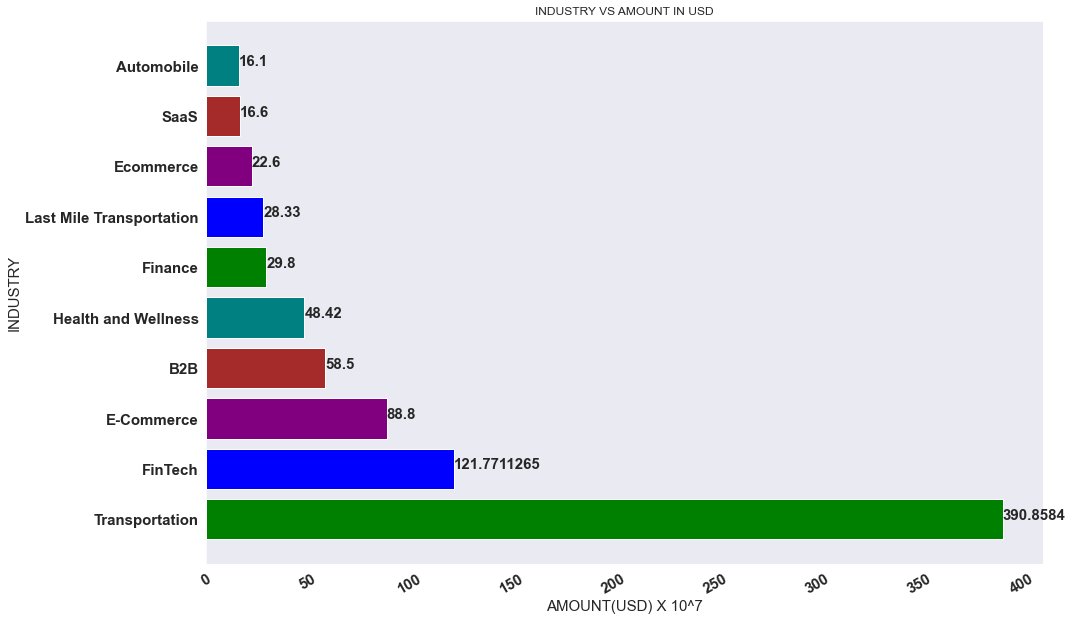

In [51]:
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (15, 10)
New_Colors = ['green','blue','purple','brown','teal']

plt.barh(industry, amount,color=New_Colors,)

plt.xticks(rotation=30, horizontalalignment="center",size=15, fontweight = 'bold')
plt.yticks(size=15, fontweight = 'bold')

plt.title('INDUSTRY VS AMOUNT IN USD')
plt.xlabel('AMOUNT(USD) X 10^7',size= 15)
plt.ylabel('INDUSTRY',SIZE=15)

for index, value in enumerate(amount):
    plt.text(value, index,
             str(value),fontweight = 'bold',size=15)

plt.show()